# Amazon 2009-2019 Best Selling Book EDA

## Business Understanding

Amazon has a huge books collection for its customers to buy or borrow. customers can give rating to the books n a 5 star scale after buy i, the people give rating can be professionals such as journalists or editors, but also can be anyone with a point of view in a specific area or amatures. The rating system is based on a score and a detailed text review. The rating can be used to recommand books to others for deciding whether to purchase a particular book or not.

In this notebook, I have got the data called "Amazon's best selling book between 2009 and 2019", and will analyze the authors, the genres and the most valueable book in this dataset.  therefor, I list out 3 business qustions to answer from the exporing:


#### Who are the most popular top 10 authors ?
#### How to give weighted rating to all the books?
#### How sells distribution in the perspective of genres ?

## Data acquisition and understanding
First , we need to import useful libraries and the dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option("display.width", 350)
[([root] + dirname + file)[0] for root, dirname, file in os.walk('/kaggle/input') if len(file)>0 ][0]

'/kaggle/input/amazon-top-50-bestselling-books-2009-2019'

In [4]:
df=pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')


## DATA UNDERSTANDING
To understanding the data , we need to have a overview of the data, including rows and columns , the size is also interesting.

In [5]:
df.shape

(550, 7)

In [6]:
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [7]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


> After first load and check, the data set has 550 rows and 7 columns
> To clean the content we need to prepare Data

## Prepare Data

### Remove Duplications

Looks like, some books has been republished in different years. and the prive may be different.  
Genre should be the same, but need to check reviews and ratings
I need to merge books with the same title, reviews, and ratings .

In [8]:
#check duplicates by .duplicated
df.duplicated(subset=['Name', 'User Rating', 'Reviews']).sum()


198

Then we have 198 books can be merged.

In [9]:
# 1 First, find out all count of books with the same name and rating.
df_name_grouped = df.groupby(["Name", 'User Rating', 'Reviews']).count()

# 2 list out which count is bigger than 1, means duplicated
df_dup = df_name_grouped.loc[(df_name_grouped['Author'] > 1)]

df_dup


,,,Author,Price,Year,Genre
Name,User Rating,Reviews,,,,
A Man Called Ove: A Novel,4.6,23848,2,2,2,2
All the Light We Cannot See,4.6,36348,2,2,2,2
Becoming,4.8,61133,2,2,2,2
Between the World and Me,4.7,10070,2,2,2,2
"Brown Bear, Brown Bear, What Do You See?",4.9,14344,2,2,2,2
...,...,...,...,...,...,...
To Kill a Mockingbird,4.8,26234,5,5,5,5
"Unbroken: A World War II Story of Survival, Resilience, and Redemption",4.8,29673,5,5,5,5
"Wheat Belly: Lose the Wheat, Lose the Weight, and Find Your Path Back to Health",4.4,7497,2,2,2,2


we have 97 books was republished.
To identify a book, I choose not only name but also rating and reviews.  so  I can safty merge them.  and can simply pick the newest version/latest year. The years are already sorted, so we can just pick the **last entry** of each duplicate.

Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

Then we can safty merge these duplicates from original dataset

In [10]:

df_remove_dup=df.drop_duplicates(subset=['Name', 'User Rating', 'Reviews'],keep = 'last',inplace = False)
df_remove_dup

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


check if we have anymore duplicated rows

In [11]:
df_remove_dup.reset_index().duplicated(['Name', 'User Rating', 'Reviews']).sum()

0

### Product as Gift should be removed

We can see in the dataframe description that some items are priced at 0. These can pose a misrepresentation later when we analyze the price and value performance.

In [12]:
price_0 = df_remove_dup.loc[df_remove_dup['Price'] == 0]
price_0

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction


I will remove these 7 rows from df_remove_dup,   then I can get the prepared dataset

In [13]:
df_cleaned = df_remove_gift = df_remove_dup.drop((df_remove_dup.loc[df_remove_dup['Price'] == 0]).index)
df_remove_gift


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


## Exploratory Data Analysis

### The Authors

To understand out business question better, I need under stand the dataset better, here are several questions need to be answered:

How many authors in the dataset ?

How many books in total? 

How many reviews in total? 

In [14]:
df_cleaned.nunique() #Count unique

Name           343
Author         245
User Rating     14
Reviews        338
Price           39
Year            11
Genre            2
dtype: int64

So, there are 245 authors in this list, and they dished out 343 best selling books

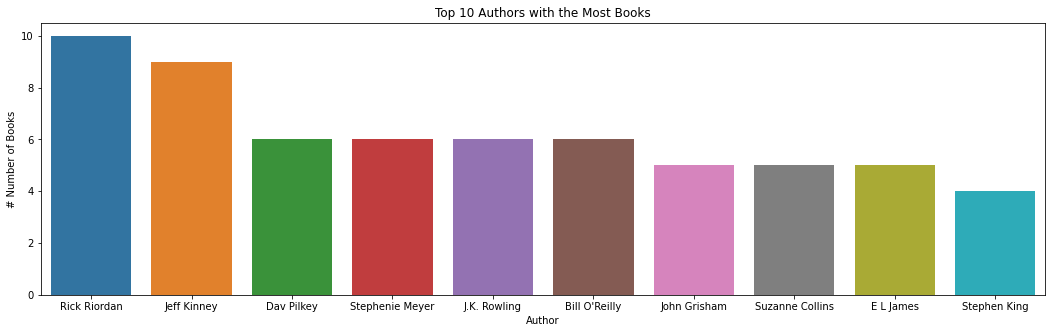

In [15]:
sorted_by_df_cleaned = df_cleaned.value_counts('Author')


top_popular= sorted_by_df_cleaned[:10]

plt.figure(figsize=(18,5))
sns.barplot(top_popular.index, top_popular.values)

plt.title('Top 10 Authors with the Most Books')
plt.ylabel('# Number of Books')
plt.show()


We see the top 10 authors with the most books published, Rick Riordan is the most popular author. Stephen King is the 10th 

In [16]:
df_cleaned.loc[df_cleaned['Author'].isin(list(top_popular.index))]
df_cleaned


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


### Bayesian average

From the overview, I can see there is a problem that the number of voting is small for less famouse books.
To solve this matter, 'Bayesian average' is ideal to be interduced here. 

My understanding is, the intuition of Bayesian average is considering the min and average value from dataset when evaluate a single element.
Individual value needs to caculate with group factors together which is "outside information".
In this way, books having a fewer votes can get weighted rating to compete with books having more votes 

From wifikepdia:
https://en.wikipedia.org/wiki/Bayesian_average


IMDB use it to give a weighted rating also, and here is imdb explanation: 
*How does IMDB calculate the rank of movies and TV shows on the Top Rated Movies and Top Rated TV Show lists?
The following formula is used to calculate the Top Rated 250 titles. This formula provides a true 'Bayesian estimate', which takes into account the number of votes each title has received, minimum votes required to be on the list, and the mean vote for all titles*

'Bayesian estimate' from imdb: 
https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV?ref_=helpms_helpart_inline#calculate


To utilize Bayesian estimate, there are 4 variables need to be considerated:

1. v = votes, reviews received by the author, number of people give rating
2. m = min votes, the lowest reviews one author can get in dataset.
3. R = mean rating, received by the author
4. C = mean rating, of the dataset

Then we calculate the weighted rating using Bayesian average in this way:

weighted_rating = (R * v / v + m ) + ( C * m / v + m)

In [17]:
# to get m and c
m = df_remove_dup['Reviews'].min()
C = df_remove_dup['User Rating'].mean()
['min review:',m,'mean rating:',C]

['min review:', 37, 'mean rating:', 4.609090909090906]

In [18]:
# prepare variables
author_counts = df_cleaned.value_counts('Author')
author_names=author_counts.index
voutes=author_counts.values
author_counts

Author
Rick Riordan           10
Jeff Kinney             9
Dav Pilkey              6
Stephenie Meyer         6
J.K. Rowling            6
                       ..
Margaret Wise Brown     1
Margaret Atwood         1
Madeleine L'Engle       1
M Prefontaine           1
Abraham Verghese        1
Length: 245, dtype: int64

In [19]:
# to initialize v and R 
ratings_sum=np.zeros(len(author_counts))
v=np.zeros(len(author_counts))
R=np.zeros(len(author_counts))
ratings=np.zeros(len(author_counts))

In [20]:
#to get weighted_rating list
get_rating_sum = lambda x: df_cleaned.loc[df_cleaned['Author'] == author_names[x], 'User Rating'].sum()
get_votes = lambda x: df_cleaned.loc[df_cleaned['Author'] == author_names[x], 'Reviews'].sum()
for i in range(0, len(author_counts)):
    ratings_sum[i] = get_rating_sum(i)
    R[i] = ratings_sum[i] / voutes[i]
    v[i] = get_votes(i)
    
    ratings[i]=(R[i] * v[i] + C * m )/(v[i]+m)

ratings[:10]

array([4.76984957, 4.79985975, 4.89975702, 4.66661591, 4.45008341,
       4.63331687, 4.40012683, 4.67997991, 4.32008179, 4.52510575])

In [21]:
#put author rating into dataframe
df_rating=pd.DataFrame({
    'Author': author_names,
    'Books Written': author_counts,
    'Reviews': v,
    'Average Rating': R,
    'Weighted Rating': ratings
})
df_rating['Average Rating']=df_rating['Average Rating'].round(decimals=4)
df_rating.head()

,Author,Books Written,Reviews,Average Rating,Weighted Rating
Author,,,,,
Rick Riordan,Rick Riordan,10,39541.0,4.7700,4.769850
Jeff Kinney,Jeff Kinney,9,50329.0,4.8000,4.799860
Dav Pilkey,Dav Pilkey,6,44261.0,4.9000,4.899757
Stephenie Meyer,Stephenie Meyer,6,41936.0,4.6667,4.666616
J.K. Rowling,J.K. Rowling,6,70535.0,4.4500,4.450083


after get weighted ratings, I can redo the rank to authors

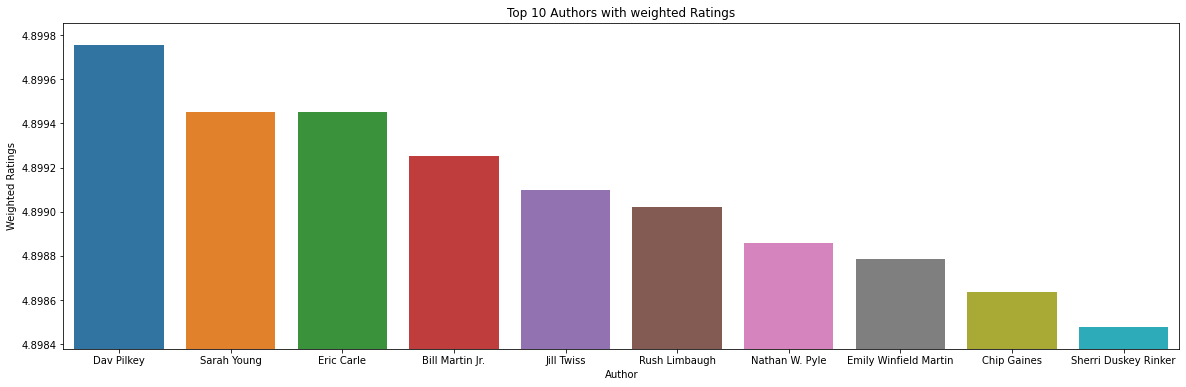

,Author,Books Written,Reviews,Average Rating,Weighted Rating
Author,,,,,
Dav Pilkey,Dav Pilkey,6,44261.0,4.9,4.899757
Sarah Young,Sarah Young,1,19576.0,4.9,4.899451
Eric Carle,Eric Carle,1,19546.0,4.9,4.899450
Bill Martin Jr.,Bill Martin Jr.,1,14344.0,4.9,4.899252
Jill Twiss,Jill Twiss,1,11881.0,4.9,4.899097
Rush Limbaugh,Rush Limbaugh,2,10986.0,4.9,4.899024
Nathan W. Pyle,Nathan W. Pyle,1,9382.0,4.9,4.898857
Emily Winfield Martin,Emily Winfield Martin,1,8842.0,4.9,4.898788
Chip Gaines,Chip Gaines,1,7861.0,4.9,4.898637


In [34]:
top_rating=df_rating.nlargest(10 ,['Weighted Rating'])
plt.figure(figsize=(20,6))
sns.barplot(top_rating['Author'], top_rating['Weighted Rating'])
plt.title('Top 10 Authors with weighted Ratings')

plt.ylim(top_rating['Weighted Rating'].min()-0.0001,top_rating['Weighted Rating'].max()+0.0001)
plt.ylabel('Weighted Ratings')
plt.show()

top_rating

The new result is different that the total count of books published. Dav Pilkey  has heightest rating.


### The Genre

Try to look into Genre category, , and find out how many groups we have by group and sum.

In [23]:
df_cleaned.groupby('Genre').sum()

,User Rating,Reviews,Price,Year
Genre,,,,
Fiction,705.3,2071992,1941,308123
Non Fiction,879.1,1343869,2644,384736


because it only have 2 categories,  we can simply rename the Gerne to isFiction, and the value to be true or false

In [24]:
df_is_fiction = df_cleaned.rename(columns={'Genre': 'isFiction'}).replace({'isFiction': {'Fiction': True, 'Non Fiction': False}})

df_is_fiction

,Name,Author,User Rating,Reviews,Price,Year,isFiction
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,False
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,True
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,False
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,True
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,False
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,True
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,False
544,Wonder,R. J. Palacio,4.8,21625,9,2017,True
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,True


In [25]:
genre_reviews = df_is_fiction.groupby("isFiction")["Reviews"].sum()
genre_ratings = df_is_fiction.groupby("isFiction")["User Rating"].sum()
genre_reviews_avg = df_is_fiction.groupby("isFiction")["Reviews"].mean()
genre_ratings_avg = df_is_fiction.groupby("isFiction")["User Rating"].mean()

In [26]:
review_and_rating=pd.DataFrame({'Genre': ['Is Fiction', 'Non Fiction'],
                          'Total Reviews': genre_reviews.values[:,],
                          'Total Ratings': genre_ratings.values[:,],
                          'Average Reviews': genre_reviews_avg.values[:,],
                          'Average Ratings': genre_ratings_avg.values[:,]})
review_and_rating

,Genre,Total Reviews,Total Ratings,Average Reviews,Average Ratings
0,Is Fiction,1343869,879.1,7035.963351,4.602618
1,Non Fiction,2071992,705.3,13542.431373,4.609804


In [27]:
#1. v = votes/reviews received by the author, number of people give rating
#2. m = min votes, the lowest reviews one author can get in dataset.
#3. R = mean rating, received by the author
#4. C = mean rating, of the dataset

vs = genre_reviews
m = df_remove_dup['Reviews'].min()
C = df_remove_dup['User Rating'].mean()
Rs = genre_ratings_avg
w_rating=np.zeros(2)

for i in range(0,len(genre_reviews.index)):
    R = Rs[i]
    v = vs[i]
    w_rating[i]=(R * v/(v+m))+(C * m/(v+m))
    

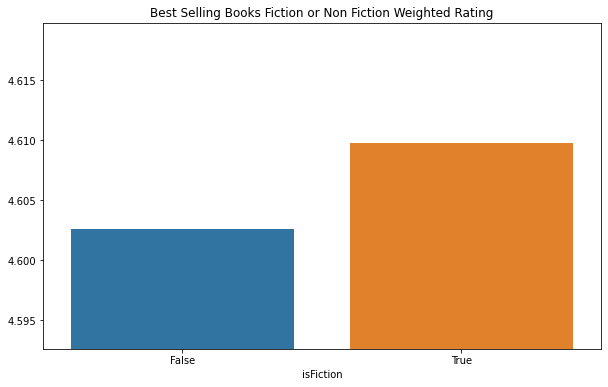

In [35]:
fig=plt.figure(figsize=(10,6))
sns.barplot(genre_reviews.index,w_rating)

plt.ylim(w_rating.min()-0.01, w_rating.max() + 0.01)
plt.title('Best Selling Books Fiction or Non Fiction Weighted Rating')
plt.show()